
**9. Multiple Linear Regression on the Auto Data Set**

**(a)** Produce a scatterplot matrix which includes all of the variables in the data set.

**(b)** Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

**(c)** Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:
   - *i.* Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.
   - *ii.* Which predictors appear to have a statistically significant relationship to the response?
   - *iii.* What does the coefficient for the `year` variable suggest?

**(d)** Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

**(e)** Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

**(f)** Try a few different transformations of the variables, such as `log(X)`, \sqrt{X}, X^2. Comment on your findings.

---

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

**(a)** Produce a scatterplot matrix which includes all of the variables in the data set.

/home/pedrohdemedeiros/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


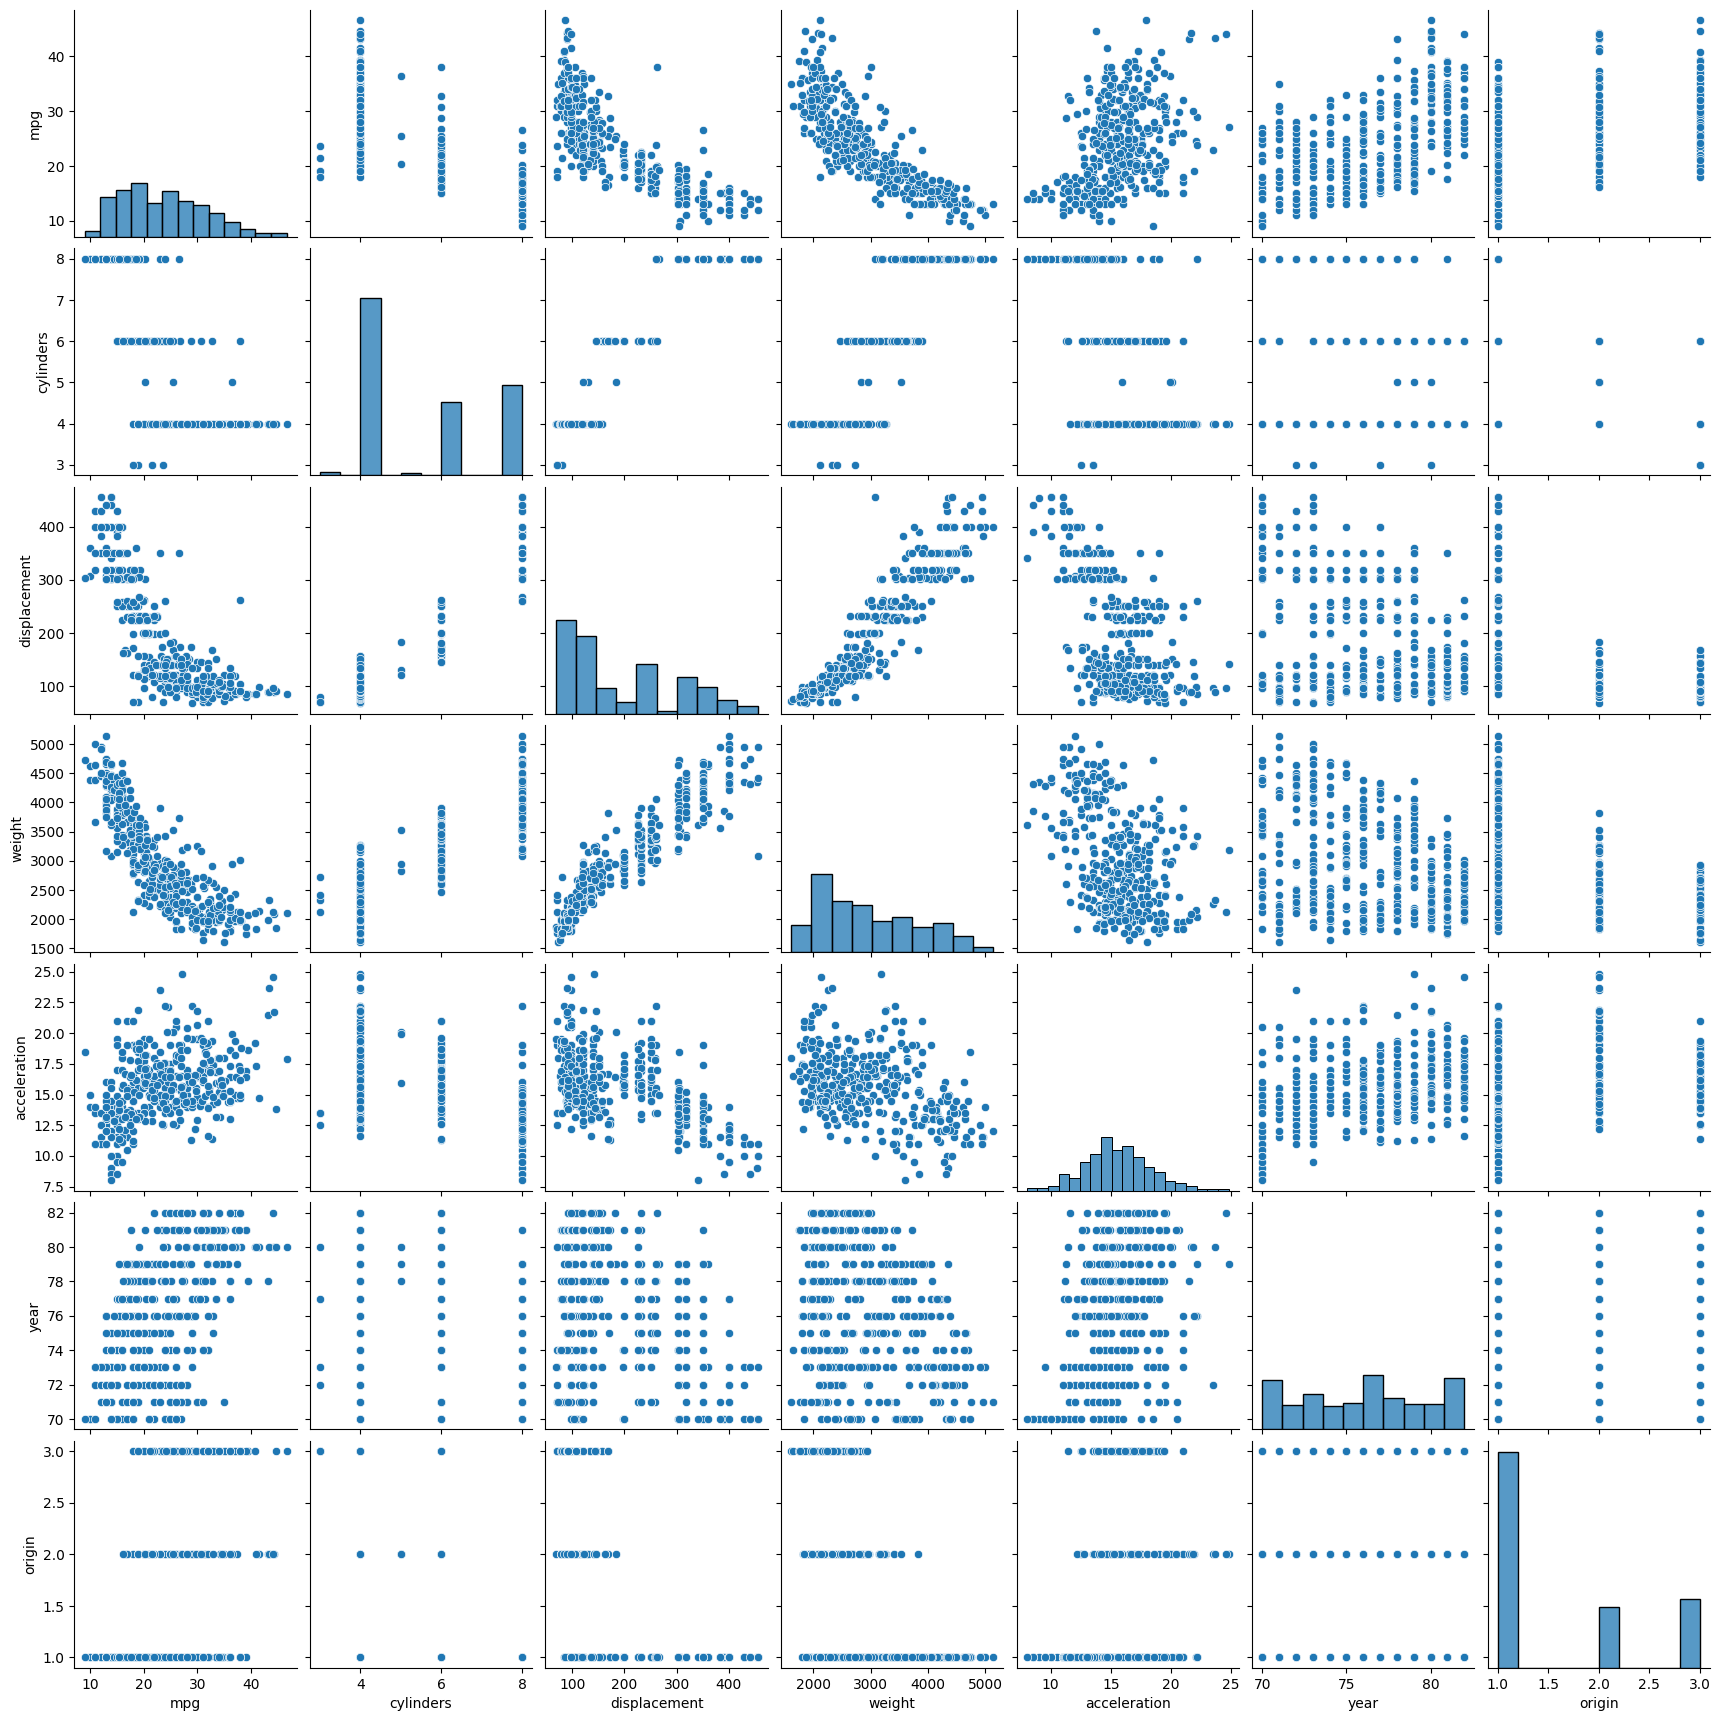

In [9]:

# Supondo que você tenha o conjunto de dados salvo localmente como 'auto.csv'
caminho_do_arquivo = '../datasets/Auto.csv'  # Substitua isso pelo caminho correto do arquivo
dados_auto = pd.read_csv(caminho_do_arquivo)

# Agora, você pode usar seaborn para criar a matriz de dispersão
sns.pairplot(dados_auto)

**(b)** Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

In [10]:



#Limpar os dados primeiro
dados_auto.replace('?', np.nan, inplace=True)

dados_auto = dados_auto.apply(pd.to_numeric, errors='coerce')

# Remover a coluna 'name'
auto_data = dados_auto.drop(columns=['name'])


#calcular a matriz
correlation_matrix = dados_auto.corr()


correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698,NaN
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972,NaN
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664,NaN
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,NaN
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265,NaN
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084,NaN
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314,NaN
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000,NaN
name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**(c)** Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:
   - *i.* Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.
   - *ii.* Which predictors appear to have a statistically significant relationship to the response?
   - *iii.* What does the coefficient for the `year` variable suggest?

In [11]:


# Substituir '?' por NaN e remover a coluna 'name'
dados_auto.replace('?', np.nan, inplace=True)
dados_auto.drop(columns=['name'], inplace=True)

# Converter todas as colunas para numérico
dados_auto = dados_auto.apply(pd.to_numeric, errors='coerce')

# Preencher NaNs com a média de cada coluna
dados_auto.fillna(dados_auto.mean(), inplace=True)

# Certificar-se de que o DataFrame não está vazio após a limpeza
if dados_auto.empty:
    raise ValueError("O DataFrame 'dados_auto' está vazio após a limpeza.")

# Definir a variável resposta e os preditores
Y = dados_auto['mpg']
X = dados_auto.drop('mpg', axis=1)

# Adicionar uma constante ao conjunto de dados
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear múltipla
model = sm.OLS(Y, X).fit()

# Imprimir os resultados do modelo
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          2.41e-141
Time:                        10:24:12   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060   

   - *i.* Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.
   - *ii.* Which predictors appear to have a statistically significant relationship to the response?
   - *iii.* What does the coefficient for the `year` variable suggest?

Segundo os dados abaixo, displacement, weight, year e origin possuem forte correlação com a resposta.
A forte correlação de year com a resposta indica que está muito relacionado à mpg de maneira direta. Quanto mais novo o carro, mais MPG 

In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Certifique-se de que 'dados_auto' é o DataFrame correto após a limpeza
# ...

# Ajustar o modelo de regressão linear múltipla usando a API de fórmula
# Aqui, 'C()' é usado para variáveis categóricas. Se todas as variáveis são numéricas, não é necessário.
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
model = ols(formula, data=auto_data).fit()

# Realizar a ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)  # typ=2 força a ANOVA a avaliar cada preditor separadamente

# Imprimir os resultados da ANOVA
print(anova_results)


                   sum_sq     df           F        PR(>F)
cylinders       25.791491    1.0    2.329125  1.277965e-01
displacement    77.612668    1.0    7.008884  8.444649e-03
horsepower      16.739754    1.0    1.511699  2.196328e-01
weight        1091.631693    1.0   98.580813  7.874953e-21
acceleration     7.358417    1.0    0.664509  4.154780e-01
year          2402.249906    1.0  216.937408  3.055983e-39
origin         291.134494    1.0   26.291171  4.665681e-07
Residual      4252.212530  384.0         NaN           NaN


(d) Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

- O gráfico de resíduos em forma de U indica que o modelo linear não descreve completamente os dados. Seria esperado resíduos randomicamente espaçados ao longo do gráfico.
- O gráfico de alavancagem revela que há sim dados que estão sendo outliers importantes para a determinação do modelo

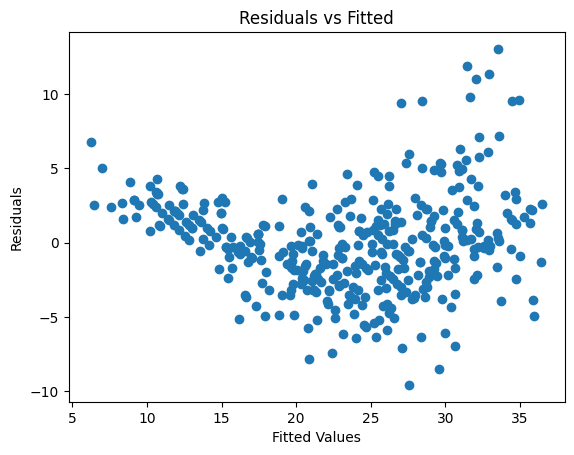

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ajuste seu modelo antes de executar este código
# model = sm.OLS(Y, X).fit()

# Residuals vs Fitted
fitted_vals = model.predict()
resids = model.resid
fig, ax = plt.subplots(1,1)
ax.scatter(fitted_vals, resids)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted')
plt.show()


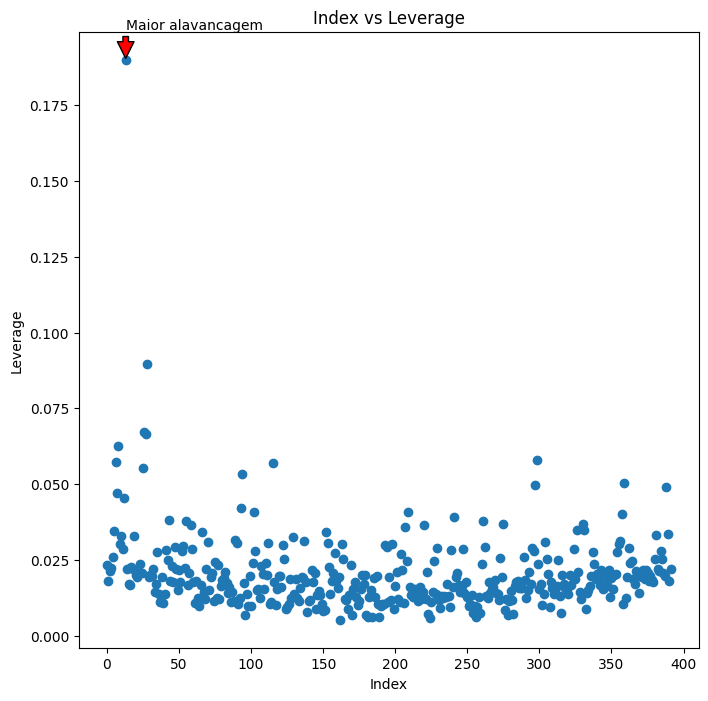

Índice do ponto com a maior alavancagem: 13


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Ajuste seu modelo antes de executar este código
# model = sm.OLS(Y, X).fit()

# Obter medidas de influência
infl = model.get_influence()

# A matriz de alavancagem deve ter o mesmo comprimento que o número de observações
leverage_vals = infl.hat_matrix_diag
n_obs = model.nobs  # Isso deve corresponder ao número de observações usadas no ajuste do modelo

if len(leverage_vals) != n_obs:
    raise ValueError(f"O número de valores de alavancagem ({len(leverage_vals)}) "
                     f"não corresponde ao número de observações ({n_obs}).")

# Criar o gráfico de alavancagem
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(np.arange(n_obs), leverage_vals)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.set_title('Index vs Leverage')

# Identificar o ponto com a maior alavancagem
max_leverage_index = np.argmax(leverage_vals)
max_leverage = leverage_vals[max_leverage_index]
plt.annotate('Maior alavancagem', xy=(max_leverage_index, max_leverage),
             xytext=(max_leverage_index, max_leverage + 0.01),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

# Imprimir o índice do ponto com maior alavancagem
print("Índice do ponto com a maior alavancagem:", max_leverage_index)


(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

Uma série de interações parecem estatísticamente relevantes:

| Termo                     | Coeficiente | Erro Padrão | t-Stat | P-valor |
|---------------------------|-------------|-------------|--------|---------|
| displacement:year         | 0.0059      | 0.002       | 2.482  | 0.014   |
| horsepower:acceleration   | -0.0072     | 0.004       | -1.939 | 0.053   |
| acceleration:year         | 0.0556      | 0.026       | 2.174  | 0.030   |
| acceleration:origin       | 0.4583      | 0.157       | 2.926  | 0.004   |


In [31]:
import pandas as pd
import statsmodels.formula.api as smf

formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

# Lista de todas as variáveis preditoras
variables = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Adicionar interações para todas as combinações de pares das variáveis preditoras
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        formula += f' + {variables[i]}:{variables[j]}'

# Ajustar o modelo com interações
model_with_interactions = smf.ols(formula, data=auto_data).fit()

# Verificar os resultados, incluindo a significância das interações
print(model_with_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          4.01e-155
Time:                        11:32:51   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

(f) Try a few different transformations of the variables, such as log(X), 'X, X2. Comment on your findings.

In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Suponha que você tenha um DataFrame chamado 'auto_data'
# Certifique-se de que 'auto_data' é o DataFrame correto após a limpeza
# ...

# Aplicar a transformação logarítmica em todas as variáveis preditoras
formula_log = 'mpg ~ np.log(cylinders) + np.log(displacement) + np.log(horsepower) + np.log(weight) + np.log(acceleration) + np.log(year) + np.log(origin)'

# Aplicar a transformação de raiz quadrada
formula_sqrt = 'mpg ~ np.sqrt(cylinders) + np.sqrt(displacement) + np.sqrt(horsepower) + np.sqrt(weight) + np.sqrt(acceleration) + np.sqrt(year) + np.sqrt(origin)'

# Aplicar a transformação quadrática
formula_squared = 'mpg ~ np.power(cylinders, 2) + np.power(displacement, 2) + np.power(horsepower, 2) + np.power(weight, 2) + np.power(acceleration, 2) + np.power(year, 2) + np.power(origin, 2)'

# Ajustar os modelos
model_log = smf.ols(formula_log, data=auto_data).fit()
model_sqrt = smf.ols(formula_sqrt, data=auto_data).fit()
model_squared = smf.ols(formula_squared, data=auto_data).fit()

# Imprimir os resumos para comparar
print("Modelo com Logaritmo:")
print(model_log.summary())
print("\nModelo com Raiz Quadrada:")
print(model_sqrt.summary())
print("\nModelo com Quadrado:")
print(model_squared.summary())


Modelo com Logaritmo:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          6.67e-153
Time:                        11:48:27   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept 

Os resultados fornecidos mostram o ajuste de diferentes modelos de regressão linear com transformações aplicadas às variáveis preditoras. Vamos comentar sobre os achados:

### Modelo Linear Original:
- **R²**: 0.822, o que significa que aproximadamente 82.2% da variabilidade de `mpg` é explicada pelo modelo.
- **Variáveis significativas**: `weight`, `year`, e `origin` têm p-valores menores que 0.05, indicando que são estatisticamente significativas.

### Modelo com Logaritmo:
- **R²**: Aumentou para 0.848, o que indica uma melhoria no ajuste do modelo.
- **Variáveis significativas**: A transformação logarítmica parece ter destacado a importância de `np.log(horsepower)`, `np.log(weight)`, `np.log(acceleration)`, `np.log(year)`, e `np.log(origin)`, pois agora têm p-valores significativos.
- **Alterações notáveis**: A variável `np.log(horsepower)` se tornou significativa, ao passo que no modelo original `horsepower` não era significativo.

### Modelo com Raiz Quadrada:
- **R²**: Diminuiu ligeiramente para 0.834 em comparação com o modelo logarítmico, mas ainda é maior que o modelo linear original.
- **Variáveis significativas**: `np.sqrt(weight)`, `np.sqrt(year)`, e `np.sqrt(origin)` são significativas, enquanto `np.sqrt(cylinders)` e `np.sqrt(displacement)` não são.

### Modelo com Quadrado:
- **R²**: 0.798, que é mais baixo que os modelos com logaritmo e raiz quadrada, mas ainda representa um bom ajuste.
- **Variáveis significativas**: A inclusão do quadrado das variáveis preditoras tornou `np.power(cylinders, 2)`, `np.power(displacement, 2)`, `np.power(acceleration, 2)`, `np.power(year, 2)`, e `np.power(origin, 2)` estatisticamente significativas.

### Comentários Gerais:
- As transformações logarítmicas e de raiz quadrada parecem ter melhorado o ajuste do modelo comparado ao modelo linear original.
- A transformação logarítmica, em particular, resultou no maior R² ajustado, sugerindo que ela foi a mais eficaz em linearizar a relação entre as variáveis preditoras e a resposta.
- A significância estatística de algumas variáveis mudou com diferentes transformações, o que indica que as relações entre essas variáveis e `mpg` podem ser não lineares.
- O modelo com variáveis ao quadrado teve um desempenho ligeiramente pior em termos de R², mas ainda revelou algumas relações quadráticas importantes.
- A presença de condições numéricas elevadas em todos os modelos sugere multicolinearidade forte, o que pode ser devido às transformações aplicadas a variáveis que já são correlacionadas.

Estas análises indicam que transformações não lineares das variáveis preditoras podem oferecer uma melhor representação da relação entre as variáveis e a resposta, comparado ao modelo linear simples. É importante notar que a escolha de transformações deve ser guiada por conhecimento do domínio e compreensão teórica das relações entre as variáveis, além de considerações estatísticas.